# CareerFoundry Exercise 4.10 SECTION PROJECT

In [3]:
##Importing Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
#Loading data set

path = r'C:\Users\rmr1q.000\Instacart Basket Analysis'
data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [5]:
#Checking column names and types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Unnamed: 0              int64   
 1   Index                   int64   
 2   order_id                int64   
 3   user_id                 int64   
 4   order_number            int64   
 5   order_day_of_week       int64   
 6   order_hour_of_day       int64   
 7   days_since_prior_order  float64 
 8   product_id              int64   
 9   add_to_cart_order       int64   
 10  reordered               int64   
 11  product_name            object  
 12  aisle_id                int64   
 13  department_id           int64   
 14  prices                  float64 
 15  price_range_loc         object  
 16  busiest day             object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  spending_average        float64 
 21  spendi

In [6]:
#Removing the Unnamed column

data.drop(columns = ['Unnamed: 0'], inplace=True)

In [7]:
#Confirming column removal

data.shape

(32404859, 33)

In [8]:
data.head()

,Index,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,First Name,Last name,Gender,State,Age,date_joined,n_dependants,fam_status,income,_merge
0,0,2539329,1,1,2,8,NaN,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,1,2398795,1,2,3,7,15.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2,473747,1,3,3,12,21.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,3,2254736,1,4,4,7,29.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,4,431534,1,5,4,15,28.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


## Part 2 Addressing any PII data

### The following columns all contain some form of personally identifiable information and should not be included in a final report or be made public.

### 'First name',
### 'Last name',
### 'Gender',
### 'State',
### 'Age',
### 'n_dependents',
### 'fam_status',
### 'income'

### All of these columns contain data that could possibly be used to identify an individual within the data set

## Part 3 Adding a regional column

In [9]:
#Defining a region sorting function

def region_flag(row):
    if row['State'] in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
        return 'Northeast'
    elif row['State'] in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        return 'Midwest'
    elif row['State'] in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        return 'South'
    elif row['State'] in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'):
        return 'West'
    else:
        return 'Misspelled'

In [10]:
#Creating a new column for the region flag

data['Region'] = data.apply(region_flag, axis=1)

In [11]:
#Checking for misspellings

data['Region'].value_counts()

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [12]:
#Checking which states were misspelled

data[['State']].loc[data['Region'] == 'Misspelled'].value_counts()

Series([], Name: count, dtype: int64)

No states have been misspelled and the region flag was implemented successfully.

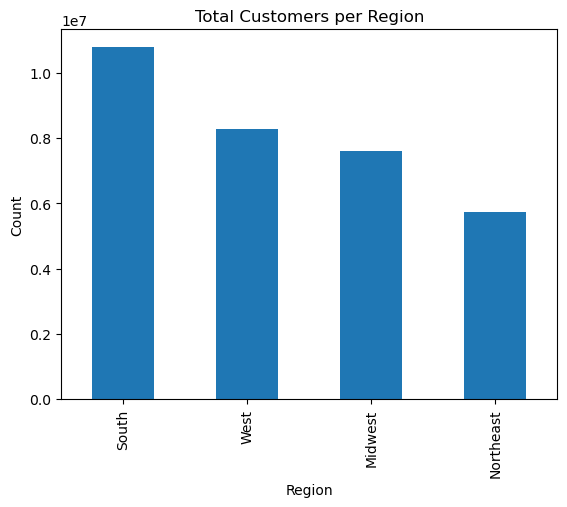

In [13]:
region_pop_bar = data['Region'].value_counts().plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Total Customers per Region')
plt.show();

## Comparing spending habits

In [14]:
#Creating a small data set to run tests

small_data=data[:100000]

In [15]:
#Creating a group of data grouped by region and spending type

group = data.groupby(['Region', 'spending_flag']).size().unstack(fill_value=0)

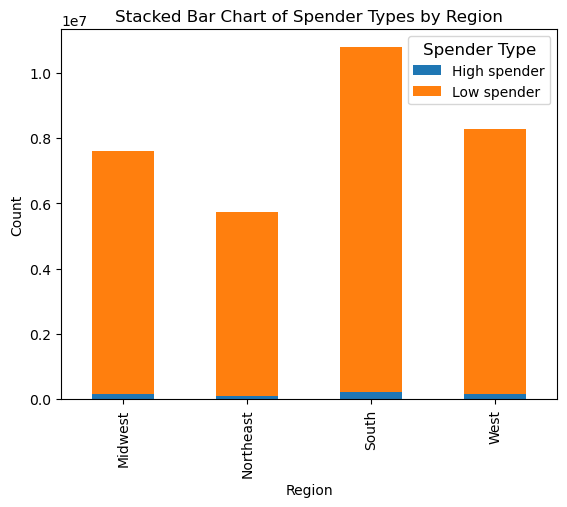

In [16]:
#Creating a stacked bar chart of regions with both high and low spenders

spending_by_region = group.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Spender Types by Region')
plt.legend(title='Spender Type', title_fontsize='12', loc='upper right')
plt.show();

In [17]:
#Creating a group of data grouped by region and shopping frequency

group2 = data.groupby(['Region', 'frequency_flag']).size().unstack(fill_value=0)

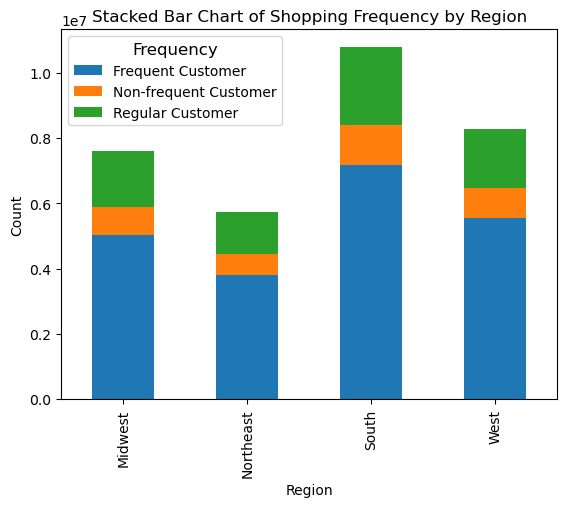

In [18]:
#Creating a stacked bar chart of regions and the different frequency types

frequency_by_region = group2.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Shopping Frequency by Region')
plt.legend(title='Frequency', title_fontsize='12', loc='upper left')
plt.show();

In [19]:
#Creating two groups to separate the high and low spenders

high_spender = data[data['spending_flag'] == 'High spender']
low_spender = data[data['spending_flag'] == 'Low spender']

In [20]:
#Grouping the data in the groups by region and counting the number of customers

high_spender_group = high_spender.groupby('Region')['spending_flag'].count()
low_spender_group = low_spender.groupby('Region')['spending_flag'].count()

In [21]:
#Sorting the regions in descending order on how many spenders they have

high_spender_group = high_spender_group.sort_values(ascending=False)
low_spender_group = low_spender_group.sort_values(ascending=False)

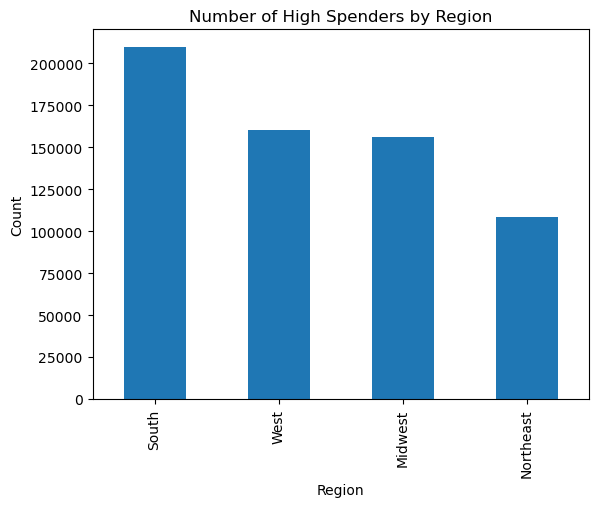

In [22]:
#Creating a bar chart of High Spenders by Region

highspender_bar = high_spender_group.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of High Spenders by Region')
plt.show;

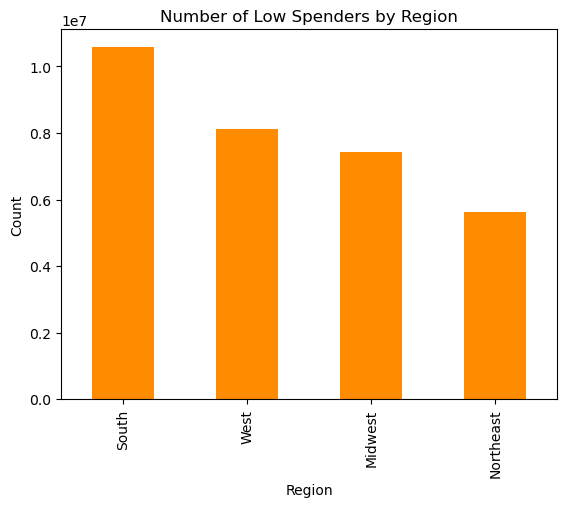

In [23]:
#Creating a bar chart of Low Spenders by Region

lowspender_bar = low_spender_group.plot(kind='bar', color='darkorange')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of Low Spenders by Region')
plt.show;

The high and low spender graphs look almost identical in terms of proportions. The more populated regions also have more spenders in both categories which makes sense. From these graphs, there is no apparent difference in spending habits between the regions. All regions have around the same proportion of low/high spenders.

In [24]:
#Viewing distribution of frequency types

data['frequency_flag'].value_counts()

frequency_flag
Frequent Customer        21559853
Regular Customer          7208564
Non-frequent Customer     3636437
Name: count, dtype: int64

In [25]:
#Creating groups to separate the different shopping frequencies.

frequent = data[data['frequency_flag'] == 'Frequent Customer']
non_frequent = data[data['frequency_flag'] == 'Non-frequent Customer']
regular = data[data['frequency_flag'] == 'Regular Customer']

In [26]:
#Grouping the data in the groups by region and counting the number of customers

frequent_group = frequent.groupby('Region')['frequency_flag'].count()
non_frequent_group = non_frequent.groupby('Region')['frequency_flag'].count()
regular_group = regular.groupby('Region')['frequency_flag'].count()

In [27]:
#Sorting the regions in descending order on how many totalfrequencies they have

frequent_group = frequent_group.sort_values(ascending=False)
non_frequent_group = non_frequent_group.sort_values(ascending=False)
regular_group = regular_group.sort_values(ascending=False)

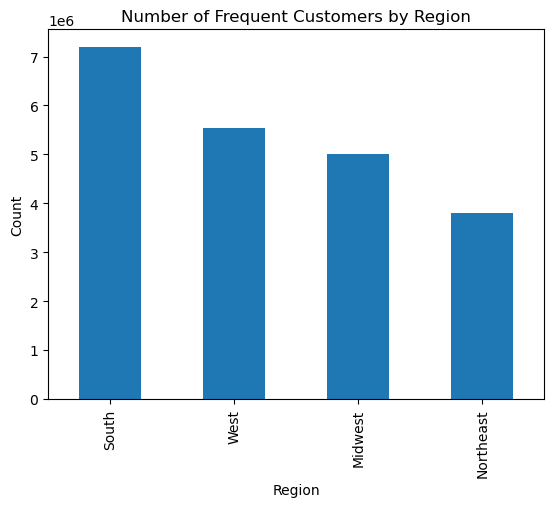

In [28]:
#Creating a bar chart of Frequent Customers by Region

frequent_bar = frequent_group.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of Frequent Customers by Region')
plt.show;

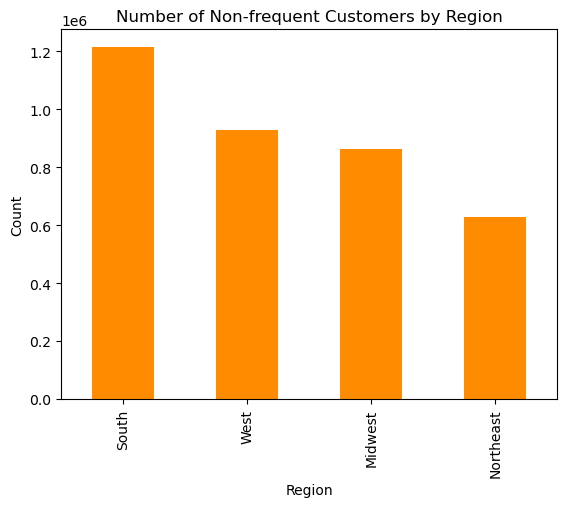

In [29]:
#Creating a bar chart of Non-frequent Customers by Region

non_frequent_bar = non_frequent_group.plot(kind='bar', color='darkorange')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of Non-frequent Customers by Region')
plt.show;

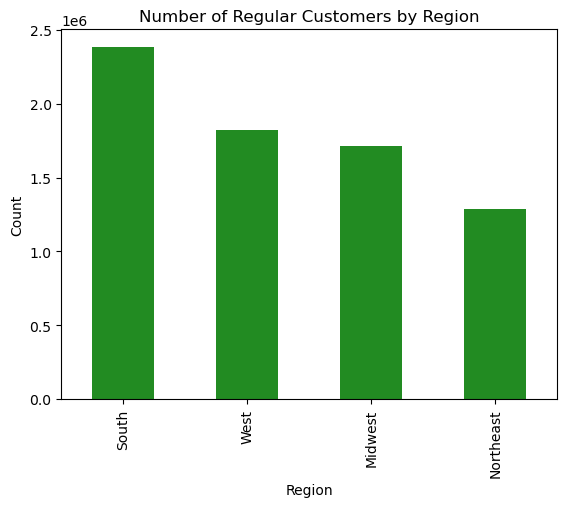

In [30]:
#Creating a bar chart of Regular Customers by Region

regular_bar = regular_group.plot(kind='bar', color='forestgreen')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of Regular Customers by Region')
plt.show;

In [31]:
#Viewing the spending averages across regions

data.groupby('Region').agg({'spending_average': ['mean', 'min', 'max']})

spending_average                   
                      mean  min           max
Region                                       
Midwest          12.715483  1.0  25005.425000
Northeast        11.554997  1.1   7414.485185
South            12.195577  1.0  15006.940000
West             11.319834  1.0  10209.987755

The descriptive statistics from each region's spending average shows that the Midwest has the highest average spending while all regions are within $1.50 of each other.

## Part 4 Identifying and removing low-activity customers

In [32]:
#Customers with 5 more orders labeled Active

data.loc[data['order_number'] >= 5, 'active_flag'] = 'Active'

C:\Users\rmr1q.000\AppData\Local\Temp\ipykernel_10408\2912094580.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Active' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data['order_number'] >= 5, 'active_flag'] = 'Active'


In [33]:
#Customers withh less than 5 orders labeled Inactive

data.loc[data['order_number'] < 5, 'active_flag'] = 'Inactive'

In [34]:
#Counting values

data['active_flag'].value_counts()

active_flag
Active      24414877
Inactive     7989982
Name: count, dtype: int64

In [35]:
#Creating a new data set with only customers with 5 or more orders

active_data = data[data['active_flag'] == 'Active']

In [36]:
active_data.shape

(24414877, 35)

## Part 5 Creating customer profiles

In [37]:
#Labeling customers based on PII in a new column

active_data.loc[active_data['Age'] < 30, 'Profile'] = 'Young Adult'

C:\Users\rmr1q.000\AppData\Local\Temp\ipykernel_10408\800528332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_data.loc[active_data['Age'] < 30, 'Profile'] = 'Young Adult'
C:\Users\rmr1q.000\AppData\Local\Temp\ipykernel_10408\800528332.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Young Adult' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  active_data.loc[active_data['Age'] < 30, 'Profile'] = 'Young Adult'


In [38]:
active_data.loc[(active_data['Age'] < 30) & (active_data['n_dependants'] > 0), 'Profile'] = 'Young Parent'

In [39]:
active_data.loc[(active_data['Age'] >= 30) & (active_data['Age'] < 65), 'Profile'] = 'Adult'

In [40]:
active_data.loc[(active_data['Age'] >= 30) & (active_data['Age'] < 65) & (active_data['fam_status']  != 'married'), 'Profile'] = 'Single Adult'

In [41]:
active_data.loc[(active_data['Age'] >= 65), 'Profile'] = 'Senior'

In [42]:
active_data.loc[(active_data['fam_status'] == 'married') & (active_data['n_dependants'] == 0), 'Profile'] = 'Married w/o kids'

In [43]:
active_data.loc[(active_data['Age'] >= 30) & (active_data['Age'] < 65) & (active_data['n_dependants'] > 0), 'Profile'] = 'Parent'

In [44]:
#Checking the number of different profiles

active_data['Profile'].value_counts()

Profile
Parent          9993584
Senior          6458450
Young Parent    3452202
Single Adult    3372583
Young Adult     1138058
Name: count, dtype: int64

In [45]:
active_data.loc[active_data['fam_status'] == 'married'].agg({'n_dependants':['min']})

,n_dependants
min,1


It was interesting that there were no customers that were married with no kids. Checking the minimum value helps determine whether this is actually true or if the code was not properly executed.

## Part 6 Creating a visualization that shows the distribution of profiles

In [46]:
#Creating a new variable for the distribution of profile types

Profiles = active_data['Profile'].value_counts()

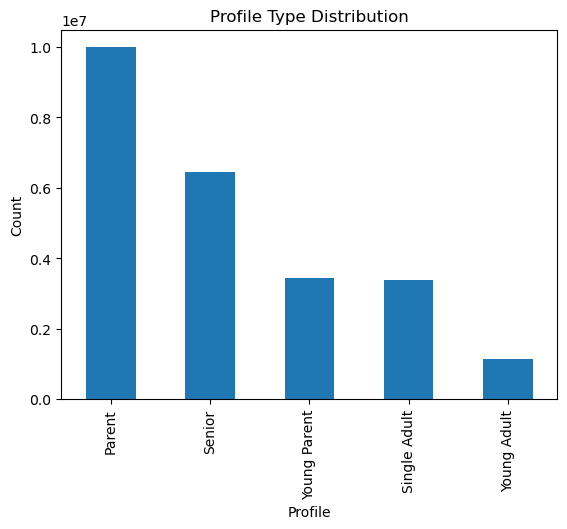

In [47]:
#creating a bar chart of the distribution of profile types

profile_bar = Profiles.plot(kind='bar')
plt.title("Profile Type Distribution")
plt.xlabel("Profile")
plt.ylabel("Count")
plt.show();

In [48]:
#Grouping data by Region and Profile type

group3 = active_data.groupby(['Region', 'Profile']).size().unstack(fill_value=0)

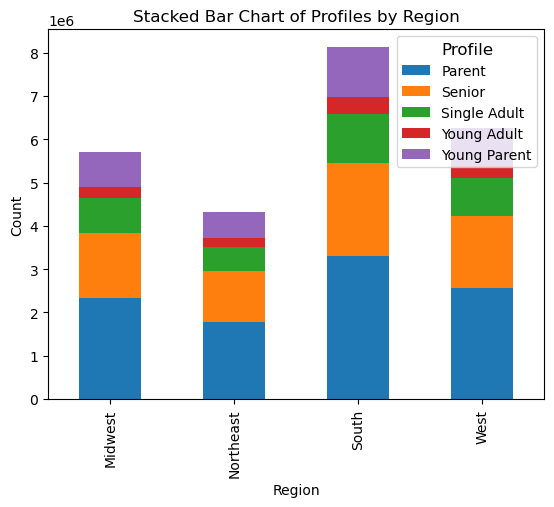

In [49]:
#Creating a bar chart to view the profile distribution across regions

profile_count_by_region = group3.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Profiles by Region')
plt.legend(title='Profile', title_fontsize='12', loc='upper right')
plt.show();

## Part 7 Aggregate descriptive statistics for the different profile types for usage frequency and expenditure

In [50]:
#Grouping the data by profiles and aggregating the spending average

active_data.groupby('Profile').agg({'spending_average': ['mean', 'min', 'max']})

spending_average                        
                         mean       min           max
Profile                                              
Parent              11.707226  1.000000   6983.593023
Senior              11.612690  1.262500  14042.512281
Single Adult        11.683895  1.000000  15006.940000
Young Adult         12.414402  2.100000   8794.882427
Young Parent        11.816857  1.628571  10209.987755

Young adults without kids seem to spend the most  amount of money on average. All other profiles are within 20 cents of each other while the young adult spending average is 60 cents above the next highest.

In [51]:
#Grouping the data by profiles and aggregating the days since last order


active_data.groupby('Profile').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                               mean  min   max
Profile                                       
Parent                    10.107077  0.0  30.0
Senior                    10.077181  0.0  30.0
Single Adult              10.014296  0.0  30.0
Young Adult               10.200941  0.0  30.0
Young Parent              10.068226  0.0  30.0

All profile types have very similar shopping frequencies. 

## Part 8 Compare profiles to regions and departments

C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

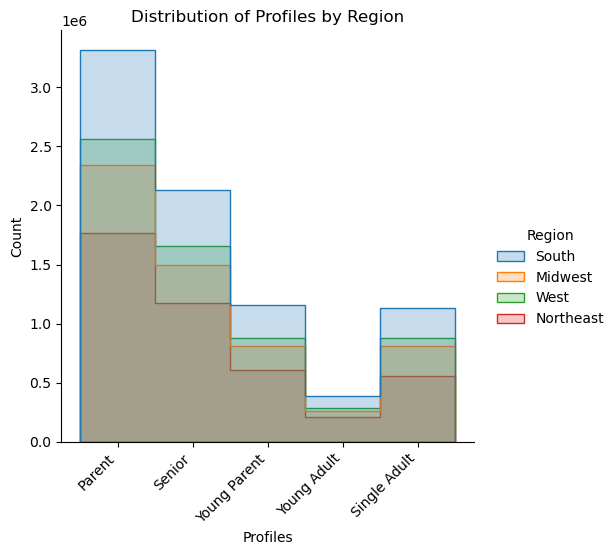

In [52]:
#Creating a bar chart to show the leading regions for profile types

Profile_by_Region_bar = sns.displot(data=active_data, x='Profile', hue='Region', element='step')
ax=plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Distribution of Profiles by Region')
plt.xlabel('Profiles')
plt.ylabel('Count')
plt.show();

There is no apparent difference in the number of different profile types between regions. The South has the largest population and also has more of every profile type which is expected if the distribution is random. 

In [53]:
#Creating a list of the departments

departments = ['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international', 'beverages', 'pets',
              'dry goods pasta', 'bulk', 'personal care', 'meat seafood', 'pantry', 'breakfast', 'canned goods',
              'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing']

C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

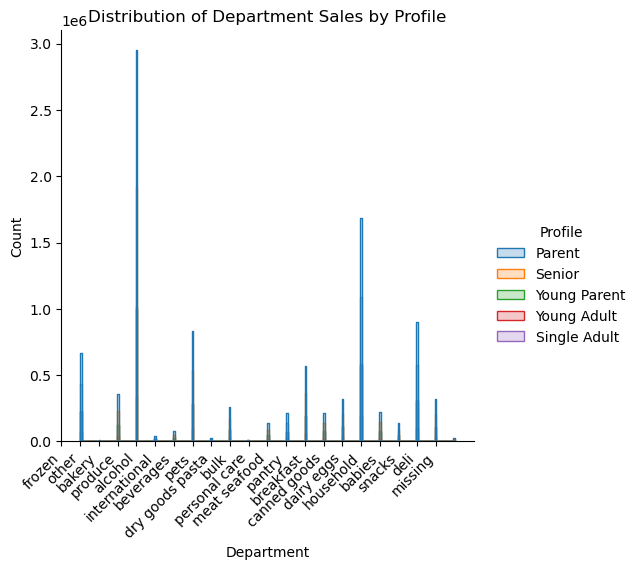

In [54]:
#Graphing department sales by profile type

Department_by_Profile_bar = sns.displot(data=active_data, x='department_id', hue='Profile', element='step')
ax=plt.gca()
plt.xticks(range(len(departments)), departments)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Distribution of Department Sales by Profile')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show();

In [55]:
#Creating new dataframes to filter the profile types

parent = active_data.loc[active_data['Profile'] == 'Parent']
senior = active_data.loc[active_data['Profile'] == 'Senior']
young_parent = active_data.loc[active_data['Profile'] == 'Young Parent']
single_adult = active_data.loc[active_data['Profile'] == 'Single Adult']
young_adult = active_data.loc[active_data['Profile'] == 'Young Adult']

C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

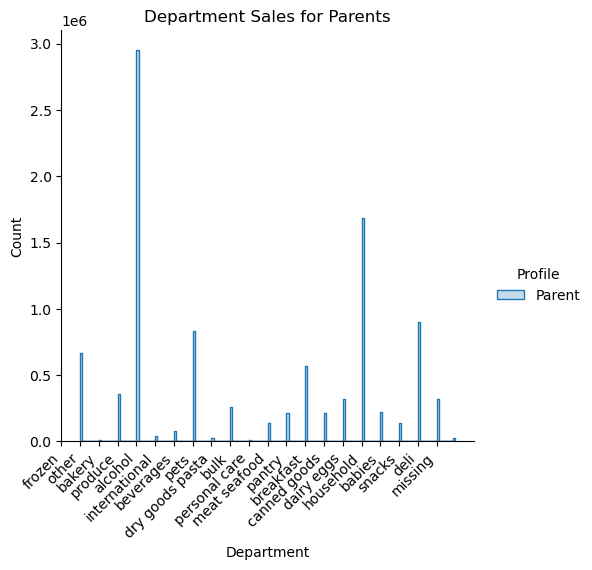

In [56]:
#Graphing department sales for parent shoppers

parent_department_bar = sns.displot(data=parent, x='department_id', hue='Profile', element='step')
ax=plt.gca()
plt.xticks(range(len(departments)), departments)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Department Sales for Parents')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show();

This graph is hard to interpret because there are too many different departments to view on the x axis. There is also a large range of department sales. Instead it may be better to only view the top departments from each profile type.

In [57]:
#Creating new dataframes for profiles in order to graph only the top departments (cbd stands for count by department).

parent_cbd = parent['department_id'].value_counts().reset_index()
parent_cbd.columns = ['Department', 'Count']
senior_cbd = senior['department_id'].value_counts().reset_index()
senior_cbd.columns = ['Department', 'Count']
young_parent_cbd = young_parent['department_id'].value_counts().reset_index()
young_parent_cbd.columns = ['Department', 'Count']
single_adult_cbd = single_adult['department_id'].value_counts().reset_index()
single_adult_cbd.columns = ['Department', 'Count']
young_adult_cbd = young_adult['department_id'].value_counts().reset_index()
young_adult_cbd.columns = ['Department', 'Count']

In [58]:
#Limiting those dataframes to only show the top 5 departments
parent_cbd_5 = parent_cbd.head(5)
senior_cbd_5 = senior_cbd.head(5)
young_parent_cbd_5 = young_parent_cbd.head(5)
single_adult_cbd_5 = single_adult_cbd.head(5)
young_adult_cbd_5 = young_adult_cbd.head(5)

C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


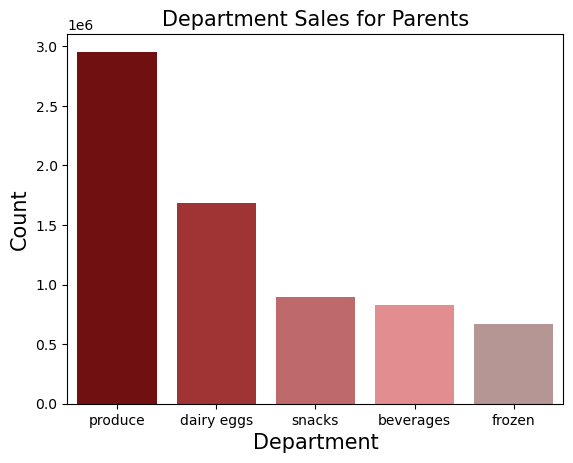

In [59]:
parent_department_bar = sns.barplot(data=parent_cbd_5, x='Department', y='Count', order=parent_cbd_5['Department'],
                                    palette= ['maroon', 'firebrick', 'indianred', 'lightcoral', 'rosybrown'])
ax=plt.gca()
plt.title('Department Sales for Parents', fontsize=15)
ax.set_xticklabels(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'])
plt.xlabel('Department', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show();

C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


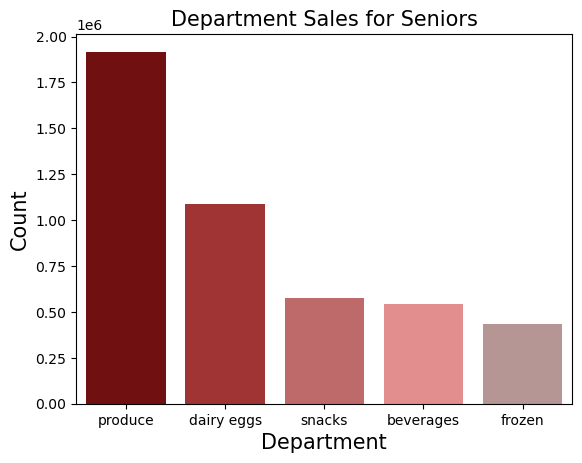

In [60]:
senior_department_bar = sns.barplot(data=senior_cbd_5, x='Department', y='Count', order=senior_cbd_5['Department'],
                                    palette= ['maroon', 'firebrick', 'indianred', 'lightcoral', 'rosybrown'])
ax=plt.gca()
plt.title('Department Sales for Seniors', fontsize=15)
ax.set_xticklabels(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'])
plt.xlabel('Department', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show();

C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


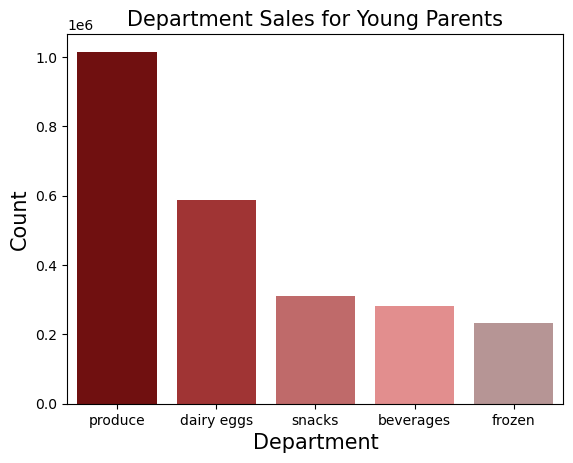

In [61]:
young_parent_department_bar = sns.barplot(data=young_parent_cbd_5, x='Department', y='Count', order=young_parent_cbd_5['Department'],
                                    palette= ['maroon', 'firebrick', 'indianred', 'lightcoral', 'rosybrown'])
ax=plt.gca()
plt.title('Department Sales for Young Parents', fontsize=15)
ax.set_xticklabels(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'])
plt.xlabel('Department', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show();

C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


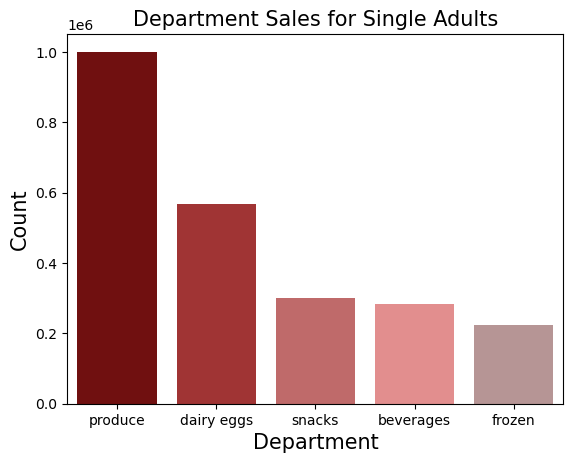

In [62]:
single_adult_department_bar = sns.barplot(data=single_adult_cbd_5, x='Department', y='Count', order=single_adult_cbd_5['Department'],
                                    palette= ['maroon', 'firebrick', 'indianred', 'lightcoral', 'rosybrown'])
ax=plt.gca()
plt.title('Department Sales for Single Adults', fontsize=15)
ax.set_xticklabels(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'])
plt.xlabel('Department', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show();

C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


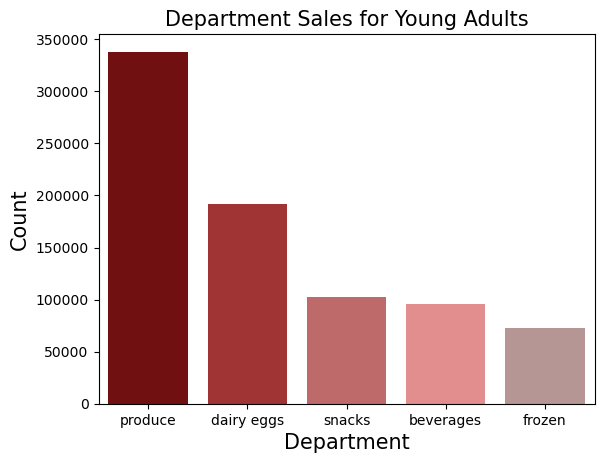

In [63]:
young_adult_department_bar = sns.barplot(data=young_adult_cbd_5, x='Department', y='Count', order=young_adult_cbd_5['Department'],
                                    palette= ['maroon', 'firebrick', 'indianred', 'lightcoral', 'rosybrown'])
ax=plt.gca()
plt.title('Department Sales for Young Adults', fontsize=15)
ax.set_xticklabels(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'])
plt.xlabel('Department', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show();

All of these are almost exactly identical except for the range. This means that there is no difference between profile types of the things they are buying. The bakery, dairy eggs, snacks, beverages, and frozen items are the most commonly purchased items across all profiles. 

In [64]:
#Creating new dataframes to filter the frequency types

frequent_df = active_data.loc[active_data['frequency_flag'] == 'Frequent Customer']
non_frequent_df = active_data.loc[active_data['frequency_flag'] == 'Non_frequent Customer']
regular_df = active_data.loc[active_data['frequency_flag'] == 'Regular Customer']

In [65]:
#Creating new dataframes for frequency types in order to graph only the top departments.

frequent_cbd = frequent_df['department_id'].value_counts().reset_index()
frequent_cbd.columns = ['Department', 'Count']
non_frequent_cbd = non_frequent_df['department_id'].value_counts().reset_index()
non_frequent_cbd.columns = ['Department', 'Count']
regular_cbd = regular_df['department_id'].value_counts().reset_index()
regular_cbd.columns = ['Department', 'Count']

In [66]:
#Limiting those dataframes to only show the top 5 departments

frequent_cbd_5 = frequent_cbd.head(5)
non_frequent_cbd_5 = frequent_cbd.head(5)
regular_cbd_5 = frequent_cbd.head(5)

C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


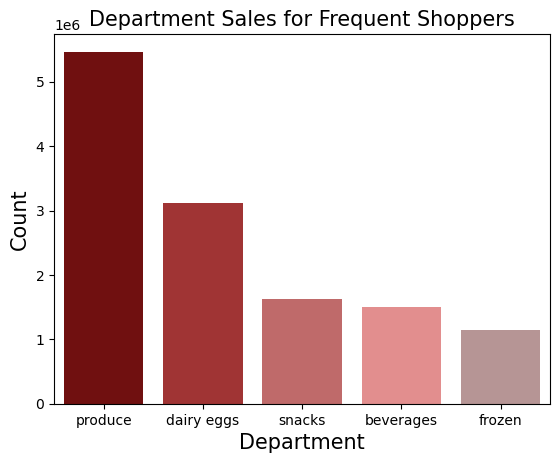

In [67]:
frequent_department_bar = sns.barplot(data=frequent_cbd_5, x='Department', y='Count', order=frequent_cbd_5['Department'],
                                    palette= ['maroon', 'firebrick', 'indianred', 'lightcoral', 'rosybrown'])
ax=plt.gca()
plt.title('Department Sales for Frequent Shoppers', fontsize=15)
ax.set_xticklabels(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'])
plt.xlabel('Department', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show();

C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


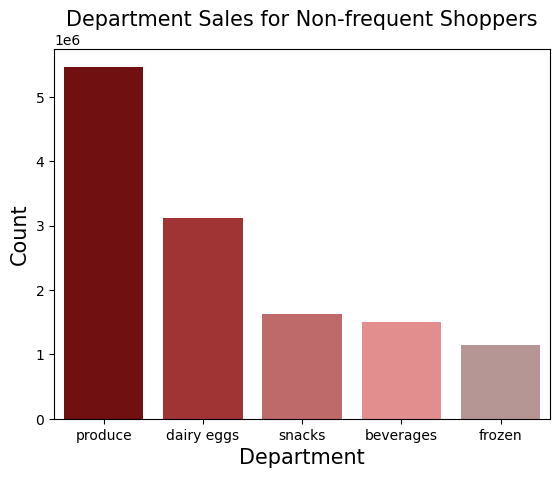

In [68]:
non_frequent_department_bar = sns.barplot(data=non_frequent_cbd_5, x='Department', y='Count', order=non_frequent_cbd_5['Department'],
                                    palette= ['maroon', 'firebrick', 'indianred', 'lightcoral', 'rosybrown'])
ax=plt.gca()
plt.title('Department Sales for Non-frequent Shoppers', fontsize=15)
ax.set_xticklabels(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'])
plt.xlabel('Department', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show();

C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


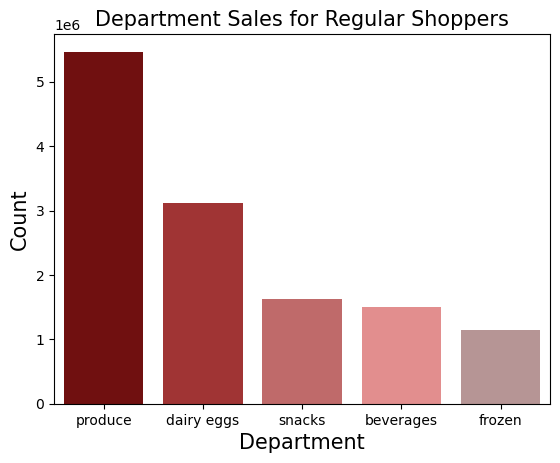

In [69]:
regular_department_bar = sns.barplot(data=regular_cbd_5, x='Department', y='Count', order=regular_cbd_5['Department'],
                                    palette= ['maroon', 'firebrick', 'indianred', 'lightcoral', 'rosybrown'])
ax=plt.gca()
plt.title('Department Sales for Regular Shoppers', fontsize=15)
ax.set_xticklabels(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'])
plt.xlabel('Department', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show();

Just like the department preferences between profiles, the frequency type of shoppers does not seem to make a difference as to what departments they purchase more from. All frequency types have the same 5 favorite departments in the same order. 

## Part 9 Exporting visualizations

In [70]:
region_pop_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Region Population Barchart.png'))

In [71]:
spending_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Spending by Region Barchart.png'))

In [72]:
highspender_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'High Spenders by Region Barchart.png'))

In [73]:
lowspender_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Low Spenders by Region Barchart.png'))

In [74]:
profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Profile Distribution Barchart.png'))

In [75]:
profile_count_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Profile Count by Region Stacked Barchart.png'))

In [76]:
Profile_by_Region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Profile Count by Region Element Barchart.png'))

In [77]:
Department_by_Profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'All Department Sales by Profile Barchart.png'))

In [78]:
parent_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Parent Top 5 Departments Barchart.png'))

In [79]:
senior_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Senior Top 5 Departments Barchart.png'))

In [80]:
single_adult_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Single Adult Top 5 Departments Barchart.png'))

In [81]:
young_adult_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Young Adult Top 5 Departments Barchart.png'))

In [82]:
young_parent_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Young Parent Top 5 Departments Barchart.png'))

In [83]:
frequency_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Shopper Frequency by Region Barchart.png'))

In [84]:
frequent_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Frequent Shoppers by Region Barchart.png'))

In [85]:
non_frequent_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Non-frequent Shoppers by Region Barchart.png'))

In [86]:
regular_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Regular Shoppers by Region Barchart.png'))

In [87]:
frequent_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Frequent Shoppers Top 5 Departments Barchart.png'))

In [88]:
non_frequent_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Non-frequent Shoppers Top 5 Departments Barchart.png'))

In [89]:
regular_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Regular Shoppers Top 5 Departments Barchart.png'))

In [90]:
#Exporting final data set
active_data.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'FINAL_DATASET_ACTIVE_CUSTOMERS.pkl'))